# Stovell.AI Job Assignment!
##### The final quantitative results could change slightly for each run due to randomness. But the conclusion will remain the same.

###### Third party support: YouTube videos, Stack Overflow and GitHub repos. 

## Building the baseline model

## This is the baseline model since I am not taking the Brent and WTI data into account.

### Importing the necessary libraries and packages

In [1]:
import numpy as np
from numpy.random import seed

import matplotlib.pyplot as plt
import pandas as pd
import math

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


### Importing the data and removing rows with NaN Date values

In [2]:
df = pd.read_csv('Kedar Job Assignment.csv', )
conditions = df.Date.isna()
df=df[~conditions]
df.head()


,Date,WTI_Price_Futures_USD_MT,Brent_Price_USD_MT,WTI_Price_USD_MT,Brent_Price_Futures_USD_MT,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,product_13
6,12/6/1992,139.9297,134.5055,138.9035,132.3065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,12/13/1992,145.3539,133.4060,139.9297,132.6730,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,12/20/1992,146.2335,134.1390,145.2073,136.0448,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,12/27/1992,142.9350,133.9924,146.3801,137.0710,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,1/3/1993,138.3904,130.8405,142.8617,134.0657,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Setting Date column as index and changing its format to datetime

In [3]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.index
df.head()

,WTI_Price_Futures_USD_MT,Brent_Price_USD_MT,WTI_Price_USD_MT,Brent_Price_Futures_USD_MT,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,product_13
Date,,,,,,,,,,,,,,,,,
1992-12-06,139.9297,134.5055,138.9035,132.3065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-13,145.3539,133.4060,139.9297,132.6730,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-20,146.2335,134.1390,145.2073,136.0448,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-27,142.9350,133.9924,146.3801,137.0710,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-01-03,138.3904,130.8405,142.8617,134.0657,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping the Brent and WTI data

In [4]:
df2 = df.drop(['WTI_Price_Futures_USD_MT', 'Brent_Price_Futures_USD_MT','Brent_Price_USD_MT','WTI_Price_USD_MT'], axis=1)
df2 = df2.drop(index=df2.index[0])
df2.head()

,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,product_13
Date,,,,,,,,,,,,,
1992-12-13,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-20,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-27,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-01-03,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-01-10,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Building the baseline LSTM model

Epoch 1/10
 - 7s - loss: 0.0032 - val_loss: 2.9538e-04
Epoch 2/10
 - 6s - loss: 7.6890e-04 - val_loss: 6.3721e-04
Epoch 3/10
 - 7s - loss: 6.5549e-04 - val_loss: 4.5765e-05
Epoch 4/10
 - 7s - loss: 5.3570e-04 - val_loss: 0.0015
Epoch 5/10
 - 7s - loss: 4.7777e-04 - val_loss: 3.3228e-04
Epoch 6/10
 - 7s - loss: 5.1872e-04 - val_loss: 2.2982e-05
Epoch 7/10
 - 7s - loss: 3.4131e-04 - val_loss: 6.3007e-05
Epoch 8/10
 - 7s - loss: 2.3795e-04 - val_loss: 1.1384e-05
Epoch 9/10
 - 7s - loss: 3.0645e-04 - val_loss: 1.1549e-04
Epoch 10/10
 - 8s - loss: 2.5708e-04 - val_loss: 3.3331e-07
Train Score of product_1: 4.74 RMSE
Test Score of product_1: 4.68 RMSE


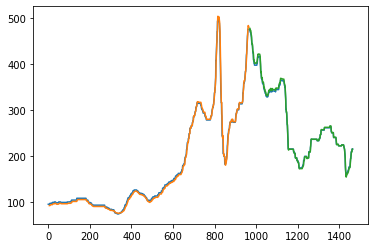

Epoch 1/10
 - 7s - loss: 0.0026 - val_loss: 2.5248e-04
Epoch 2/10
 - 7s - loss: 6.9620e-04 - val_loss: 8.6984e-06
Epoch 3/10
 - 7s - loss: 4.7227e-04 - val_loss: 0.0028
Epoch 4/10
 - 7s - loss: 4.9052e-04 - val_loss: 3.5229e-08
Epoch 5/10
 - 7s - loss: 3.4898e-04 - val_loss: 1.1724e-05
Epoch 6/10
 - 7s - loss: 3.7080e-04 - val_loss: 4.2362e-05
Epoch 7/10
 - 7s - loss: 2.6250e-04 - val_loss: 0.0040
Epoch 8/10
 - 8s - loss: 2.4435e-04 - val_loss: 3.1754e-04
Epoch 9/10
 - 7s - loss: 2.5720e-04 - val_loss: 6.1193e-05
Epoch 10/10
 - 6s - loss: 2.2718e-04 - val_loss: 4.3631e-07
Train Score of product_2: 6.33 RMSE
Test Score of product_2: 6.34 RMSE


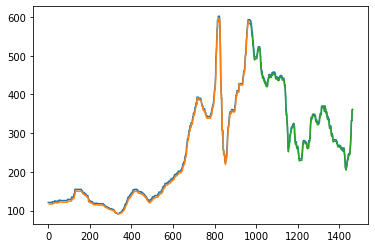

Epoch 1/10
 - 8s - loss: 0.0038 - val_loss: 2.0327e-04
Epoch 2/10
 - 7s - loss: 4.6004e-04 - val_loss: 2.0312e-04
Epoch 3/10
 - 6s - loss: 4.9696e-04 - val_loss: 2.5807e-04
Epoch 4/10
 - 8s - loss: 5.7630e-04 - val_loss: 3.8792e-05
Epoch 5/10
 - 7s - loss: 4.3574e-04 - val_loss: 2.3434e-05
Epoch 6/10
 - 7s - loss: 2.4823e-04 - val_loss: 7.8618e-05
Epoch 7/10
 - 7s - loss: 2.2623e-04 - val_loss: 3.0051e-05
Epoch 8/10
 - 8s - loss: 2.3618e-04 - val_loss: 5.4912e-04
Epoch 9/10
 - 7s - loss: 2.3575e-04 - val_loss: 1.1759e-04
Epoch 10/10
 - 8s - loss: 1.9133e-04 - val_loss: 3.6061e-05
Train Score of product_3: 8.43 RMSE
Test Score of product_3: 11.94 RMSE


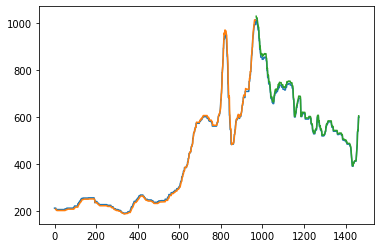

Epoch 1/10
 - 2s - loss: 0.0285 - val_loss: 0.0040
Epoch 2/10
 - 2s - loss: 0.0022 - val_loss: 0.0114
Epoch 3/10
 - 1s - loss: 0.0023 - val_loss: 0.0045
Epoch 4/10
 - 1s - loss: 0.0024 - val_loss: 0.0032
Epoch 5/10
 - 1s - loss: 0.0020 - val_loss: 7.5706e-04
Epoch 6/10
 - 1s - loss: 0.0022 - val_loss: 0.0059
Epoch 7/10
 - 1s - loss: 0.0019 - val_loss: 1.7251e-04
Epoch 8/10
 - 1s - loss: 0.0021 - val_loss: 0.0052
Epoch 9/10
 - 1s - loss: 0.0019 - val_loss: 0.0031
Epoch 10/10
 - 1s - loss: 0.0022 - val_loss: 9.1983e-04
Train Score of product_4: 2.00 RMSE
Test Score of product_4: 3.37 RMSE


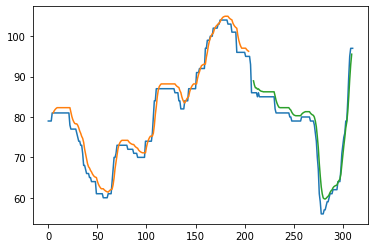

Epoch 1/10
 - 2s - loss: 0.0342 - val_loss: 0.0068
Epoch 2/10
 - 1s - loss: 0.0035 - val_loss: 0.0089
Epoch 3/10
 - 1s - loss: 0.0030 - val_loss: 0.0029
Epoch 4/10
 - 1s - loss: 0.0030 - val_loss: 0.0012
Epoch 5/10
 - 2s - loss: 0.0025 - val_loss: 0.0070
Epoch 6/10
 - 2s - loss: 0.0022 - val_loss: 1.9708e-04
Epoch 7/10
 - 1s - loss: 0.0017 - val_loss: 8.9912e-04
Epoch 8/10
 - 1s - loss: 0.0016 - val_loss: 6.2258e-04
Epoch 9/10
 - 1s - loss: 0.0014 - val_loss: 1.0083e-04
Epoch 10/10
 - 1s - loss: 0.0013 - val_loss: 0.0042
Train Score of product_5: 8.47 RMSE
Test Score of product_5: 7.17 RMSE


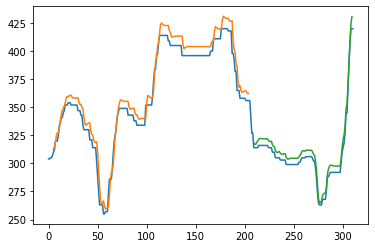

Epoch 1/10
 - 7s - loss: 0.0025 - val_loss: 6.6881e-07
Epoch 2/10
 - 5s - loss: 9.6246e-04 - val_loss: 7.4544e-04
Epoch 3/10
 - 6s - loss: 6.8484e-04 - val_loss: 5.3340e-04
Epoch 4/10
 - 6s - loss: 6.4093e-04 - val_loss: 7.2020e-05
Epoch 5/10
 - 6s - loss: 5.9757e-04 - val_loss: 3.5873e-06
Epoch 6/10
 - 6s - loss: 3.8904e-04 - val_loss: 3.1267e-04
Epoch 7/10
 - 6s - loss: 4.0643e-04 - val_loss: 5.2107e-05
Epoch 8/10
 - 7s - loss: 3.2185e-04 - val_loss: 1.6194e-04
Epoch 9/10
 - 6s - loss: 2.8840e-04 - val_loss: 8.0596e-05
Epoch 10/10
 - 6s - loss: 2.6180e-04 - val_loss: 2.0063e-04
Train Score of product_6: 7.80 RMSE
Test Score of product_6: 8.80 RMSE


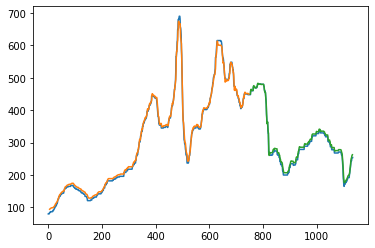

Epoch 1/10
 - 6s - loss: 0.0042 - val_loss: 0.0012
Epoch 2/10
 - 5s - loss: 7.7099e-04 - val_loss: 4.1690e-04
Epoch 3/10
 - 6s - loss: 8.2698e-04 - val_loss: 3.3148e-04
Epoch 4/10
 - 5s - loss: 4.9383e-04 - val_loss: 5.9881e-06
Epoch 5/10
 - 5s - loss: 4.4441e-04 - val_loss: 1.3055e-04
Epoch 6/10
 - 5s - loss: 4.2675e-04 - val_loss: 9.1360e-05
Epoch 7/10
 - 5s - loss: 2.8617e-04 - val_loss: 3.0461e-04
Epoch 8/10
 - 5s - loss: 3.0703e-04 - val_loss: 1.7412e-06
Epoch 9/10
 - 5s - loss: 1.8311e-04 - val_loss: 1.5434e-06
Epoch 10/10
 - 5s - loss: 2.2100e-04 - val_loss: 8.4145e-05
Train Score of product_7: 8.33 RMSE
Test Score of product_7: 9.84 RMSE


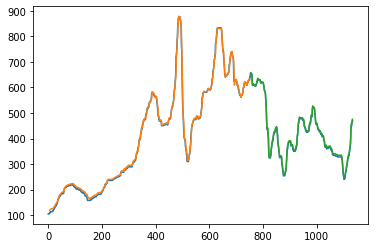

Epoch 1/10
 - 6s - loss: 0.0024 - val_loss: 7.4118e-05
Epoch 2/10
 - 6s - loss: 8.4651e-04 - val_loss: 2.4442e-04
Epoch 3/10
 - 5s - loss: 6.6012e-04 - val_loss: 3.0835e-04
Epoch 4/10
 - 6s - loss: 5.7836e-04 - val_loss: 5.6446e-06
Epoch 5/10
 - 5s - loss: 4.1022e-04 - val_loss: 1.0269e-05
Epoch 6/10
 - 5s - loss: 4.2678e-04 - val_loss: 3.1710e-07
Epoch 7/10
 - 5s - loss: 3.1648e-04 - val_loss: 2.2797e-05
Epoch 8/10
 - 5s - loss: 2.9058e-04 - val_loss: 4.9883e-06
Epoch 9/10
 - 5s - loss: 2.3519e-04 - val_loss: 5.2612e-04
Epoch 10/10
 - 6s - loss: 2.8663e-04 - val_loss: 2.5031e-04
Train Score of product_8: 9.06 RMSE
Test Score of product_8: 10.39 RMSE


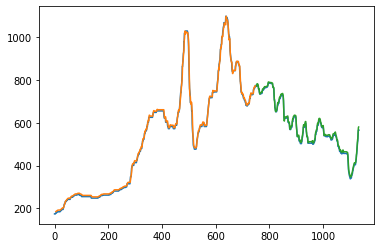

Epoch 1/10
 - 4s - loss: 0.0122 - val_loss: 0.0027
Epoch 2/10
 - 3s - loss: 0.0010 - val_loss: 3.2843e-04
Epoch 3/10
 - 3s - loss: 0.0012 - val_loss: 0.0023
Epoch 4/10
 - 3s - loss: 9.9884e-04 - val_loss: 0.0016
Epoch 5/10
 - 2s - loss: 9.9407e-04 - val_loss: 9.9333e-04
Epoch 6/10
 - 2s - loss: 0.0012 - val_loss: 0.0026
Epoch 7/10
 - 3s - loss: 7.4248e-04 - val_loss: 0.0023
Epoch 8/10
 - 3s - loss: 8.2755e-04 - val_loss: 2.8005e-04
Epoch 9/10
 - 3s - loss: 6.1002e-04 - val_loss: 6.5686e-04
Epoch 10/10
 - 3s - loss: 5.8332e-04 - val_loss: 0.0017
Train Score of product_9: 8.12 RMSE
Test Score of product_9: 7.92 RMSE


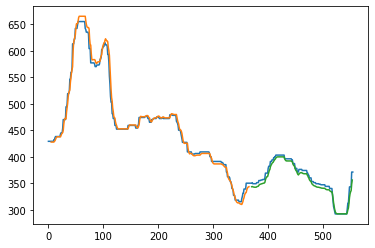

Epoch 1/10
 - 3s - loss: 0.0114 - val_loss: 7.5876e-04
Epoch 2/10
 - 2s - loss: 0.0015 - val_loss: 0.0036
Epoch 3/10
 - 2s - loss: 0.0012 - val_loss: 0.0015
Epoch 4/10
 - 2s - loss: 0.0010 - val_loss: 6.3334e-04
Epoch 5/10
 - 3s - loss: 0.0011 - val_loss: 0.0016
Epoch 6/10
 - 2s - loss: 0.0010 - val_loss: 0.0055
Epoch 7/10
 - 2s - loss: 9.4065e-04 - val_loss: 8.9924e-04
Epoch 8/10
 - 2s - loss: 8.4233e-04 - val_loss: 0.0019
Epoch 9/10
 - 2s - loss: 7.8042e-04 - val_loss: 9.8243e-04
Epoch 10/10
 - 2s - loss: 8.3062e-04 - val_loss: 0.0019
Train Score of product_10: 5.54 RMSE
Test Score of product_10: 6.80 RMSE


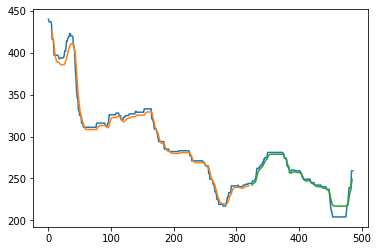

Epoch 1/10
 - 3s - loss: 0.0073 - val_loss: 0.0073
Epoch 2/10
 - 2s - loss: 0.0011 - val_loss: 0.0057
Epoch 3/10
 - 2s - loss: 9.8417e-04 - val_loss: 0.0011
Epoch 4/10
 - 2s - loss: 0.0010 - val_loss: 0.0058
Epoch 5/10
 - 3s - loss: 9.0047e-04 - val_loss: 0.0052
Epoch 6/10
 - 3s - loss: 7.3961e-04 - val_loss: 0.0030
Epoch 7/10
 - 2s - loss: 9.8146e-04 - val_loss: 0.0026
Epoch 8/10
 - 2s - loss: 6.3987e-04 - val_loss: 0.0048
Epoch 9/10
 - 3s - loss: 8.0483e-04 - val_loss: 0.0038
Epoch 10/10
 - 2s - loss: 6.2555e-04 - val_loss: 0.0027
Train Score of product_11: 0.93 RMSE
Test Score of product_11: 1.10 RMSE


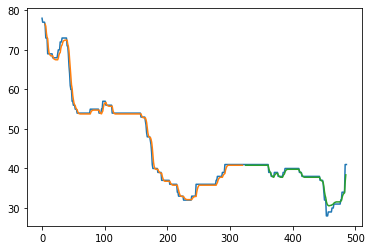

Epoch 1/10
 - 3s - loss: 0.0168 - val_loss: 2.9193e-04
Epoch 2/10
 - 2s - loss: 0.0012 - val_loss: 3.0944e-06
Epoch 3/10
 - 2s - loss: 0.0010 - val_loss: 1.1652e-04
Epoch 4/10
 - 3s - loss: 0.0011 - val_loss: 0.0014
Epoch 5/10
 - 3s - loss: 0.0011 - val_loss: 0.0012
Epoch 6/10
 - 3s - loss: 0.0010 - val_loss: 1.3349e-05
Epoch 7/10
 - 3s - loss: 9.7245e-04 - val_loss: 2.2391e-04
Epoch 8/10
 - 2s - loss: 8.3915e-04 - val_loss: 2.6684e-04
Epoch 9/10
 - 3s - loss: 8.7969e-04 - val_loss: 1.5613e-04
Epoch 10/10
 - 3s - loss: 0.0010 - val_loss: 8.5477e-04
Train Score of product_12: 10.95 RMSE
Test Score of product_12: 12.91 RMSE


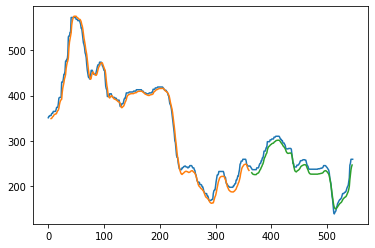

Epoch 1/10
 - 4s - loss: 0.0124 - val_loss: 2.1557e-04
Epoch 2/10
 - 3s - loss: 0.0015 - val_loss: 7.5346e-04
Epoch 3/10
 - 3s - loss: 0.0013 - val_loss: 0.0014
Epoch 4/10
 - 3s - loss: 0.0011 - val_loss: 2.5994e-04
Epoch 5/10
 - 3s - loss: 0.0012 - val_loss: 7.4240e-04
Epoch 6/10
 - 3s - loss: 0.0013 - val_loss: 1.0401e-05
Epoch 7/10
 - 3s - loss: 0.0011 - val_loss: 1.4283e-04
Epoch 8/10
 - 3s - loss: 0.0010 - val_loss: 0.0030
Epoch 9/10
 - 2s - loss: 0.0011 - val_loss: 3.6201e-04
Epoch 10/10
 - 2s - loss: 7.9474e-04 - val_loss: 4.4991e-04
Train Score of product_13: 9.84 RMSE
Test Score of product_13: 7.41 RMSE


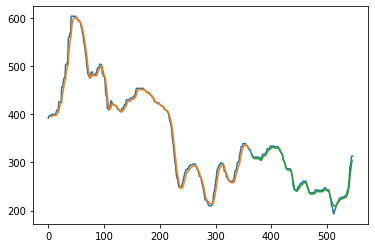

In [5]:
from keras.preprocessing.sequence import TimeseriesGenerator

seq_size = length = 5 #Forecasting window (5 weeks)
batch_size = 1
num_features = 1

trainScore_list = []
testScore_list = []

# This loop will run the model for each product and calculate the RMSE for each product
for product in df2.columns:
    dataset = df2[[f'{product}']].dropna()
    dataset.head()
    dataset = dataset.values
    dataset = dataset.astype('float32')

    #Scaling the data
    scaler = MinMaxScaler(feature_range=(0,1))
    dataset = scaler.fit_transform(dataset)

    #Setting train and testing data (70:30 ratio)
    train_size = int(len(dataset) * 0.66)
    test_size = len(dataset) - train_size
    train,test = dataset[0:train_size:],dataset[train_size:len(dataset),:]
    
    #Formatting the data for time series forecasting
    train_generator = TimeseriesGenerator(train,train,length=length,batch_size=batch_size)
    validation_generator = TimeseriesGenerator(test,test,length=length,batch_size=batch_size)

    #Building the model
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=False, input_shape=(length, num_features)))
    model.add(Dense(32))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    #Fitting the model
    model.fit_generator(generator=train_generator, verbose=2, epochs=10, validation_data=validation_generator)

    #Generating Train and Test predictions
    trainPredict = model.predict(train_generator)
    testPredict = model.predict(validation_generator)
    
    #Reversing the scaling that's done above
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY_inverse = scaler.inverse_transform(train)
    testPredict = scaler.inverse_transform(testPredict)
    testY_inverse = scaler.inverse_transform(test)
    
    #Calculating training and testing error (RMSE)
    trainScore = math.sqrt(mean_squared_error(trainY_inverse[length:], trainPredict[:,0]))
    testScore = math.sqrt(mean_squared_error(testY_inverse[length:], testPredict[:,0]))
    print(f'Train Score of {product}: {trainScore:.2f} RMSE')
    print(f'Test Score of {product}: {testScore:.2f} RMSE')
    
    #Adding training and testing scores for each product for a seprate list so later we can calculate the average
    trainScore_list.append(trainScore)
    testScore_list.append(testScore)
    
    #Shfting the training results so that it lines up with the original data
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[length:len(trainPredict)+length, :] = trainPredict
    
    #Shifting the testing results so that it lines up with the original data
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train)+(length)-1:len(dataset)-1, :] = testPredict
    
    #Plotting the final results for each product. 
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

### Calculating the overall final results. 

In [6]:
print(f'Average Train Score = {sum(trainScore_list)/len(trainScore_list)}')
print(f'Average Test Score = {sum(testScore_list)/len(testScore_list)}')

Average Train Score = 6.964430147485226
Average Test Score = 7.590667109225037


## Building a model alternative to the baseline model build above
#### I am building this from scratch so you might see some code redundant to what is seen above

### Importing the data and removing rows with NaN Date values

In [7]:
df = pd.read_csv('Kedar Job Assignment.csv')
conditions = df.Date.isna()
df=df[~conditions]
df.head()

,Date,WTI_Price_Futures_USD_MT,Brent_Price_USD_MT,WTI_Price_USD_MT,Brent_Price_Futures_USD_MT,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,product_13
6,12/6/1992,139.9297,134.5055,138.9035,132.3065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,12/13/1992,145.3539,133.4060,139.9297,132.6730,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,12/20/1992,146.2335,134.1390,145.2073,136.0448,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,12/27/1992,142.9350,133.9924,146.3801,137.0710,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,1/3/1993,138.3904,130.8405,142.8617,134.0657,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Setting Date column as index and changing its format to datetime

In [8]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.index
df.head()

,WTI_Price_Futures_USD_MT,Brent_Price_USD_MT,WTI_Price_USD_MT,Brent_Price_Futures_USD_MT,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,product_13
Date,,,,,,,,,,,,,,,,,
1992-12-06,139.9297,134.5055,138.9035,132.3065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-13,145.3539,133.4060,139.9297,132.6730,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-20,146.2335,134.1390,145.2073,136.0448,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-27,142.9350,133.9924,146.3801,137.0710,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-01-03,138.3904,130.8405,142.8617,134.0657,95.0,121.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Seperating the features from the product

In [9]:
cols_f = list(df)[0:4]
df_features = df[cols_f]

cols_p = list(df)[4:]
df_product = df[cols_p]

### Building the alternative LSTM  model

Epoch 1/10
 - 8s - loss: 0.0023 - val_loss: 8.4401e-04
Epoch 2/10
 - 7s - loss: 8.3036e-04 - val_loss: 2.8933e-04
Epoch 3/10
 - 8s - loss: 7.1694e-04 - val_loss: 4.6499e-05
Epoch 4/10
 - 7s - loss: 6.8942e-04 - val_loss: 1.3262e-04
Epoch 5/10
 - 7s - loss: 5.2725e-04 - val_loss: 1.4356e-04
Epoch 6/10
 - 7s - loss: 6.4414e-04 - val_loss: 3.4648e-04
Epoch 7/10
 - 7s - loss: 4.3403e-04 - val_loss: 1.4172e-04
Epoch 8/10
 - 7s - loss: 3.9281e-04 - val_loss: 1.3785e-04
Epoch 9/10
 - 7s - loss: 3.1474e-04 - val_loss: 2.2516e-04
Epoch 10/10
 - 7s - loss: 3.6215e-04 - val_loss: 2.4063e-04
Train Score of product_1: 10.58 RMSE
Test Score of product_1: 11.96 RMSE


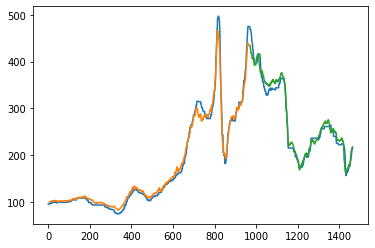

Epoch 1/10
 - 7s - loss: 0.0063 - val_loss: 0.0019
Epoch 2/10
 - 7s - loss: 8.8266e-04 - val_loss: 0.0015
Epoch 3/10
 - 7s - loss: 8.1906e-04 - val_loss: 4.7679e-04
Epoch 4/10
 - 7s - loss: 6.7046e-04 - val_loss: 6.9322e-04
Epoch 5/10
 - 8s - loss: 6.1524e-04 - val_loss: 0.0011
Epoch 6/10
 - 8s - loss: 4.9823e-04 - val_loss: 5.3585e-04
Epoch 7/10
 - 7s - loss: 5.8544e-04 - val_loss: 0.0011
Epoch 8/10
 - 7s - loss: 3.9973e-04 - val_loss: 0.0010
Epoch 9/10
 - 6s - loss: 4.2889e-04 - val_loss: 7.9506e-04
Epoch 10/10
 - 7s - loss: 3.0057e-04 - val_loss: 2.6808e-04
Train Score of product_2: 5.22 RMSE
Test Score of product_2: 12.14 RMSE


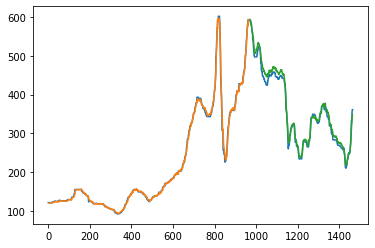

Epoch 1/10
 - 8s - loss: 0.0038 - val_loss: 7.6345e-04
Epoch 2/10
 - 7s - loss: 8.9598e-04 - val_loss: 8.6512e-04
Epoch 3/10
 - 8s - loss: 7.3276e-04 - val_loss: 3.8718e-04
Epoch 4/10
 - 7s - loss: 6.1726e-04 - val_loss: 7.0506e-04
Epoch 5/10
 - 8s - loss: 5.6175e-04 - val_loss: 2.6261e-04
Epoch 6/10
 - 7s - loss: 4.9499e-04 - val_loss: 8.2795e-04
Epoch 7/10
 - 7s - loss: 4.4459e-04 - val_loss: 0.0017
Epoch 8/10
 - 7s - loss: 4.2138e-04 - val_loss: 3.5285e-04
Epoch 9/10
 - 7s - loss: 3.6475e-04 - val_loss: 5.6024e-04
Epoch 10/10
 - 7s - loss: 3.6250e-04 - val_loss: 5.0025e-04
Train Score of product_3: 8.80 RMSE
Test Score of product_3: 22.06 RMSE


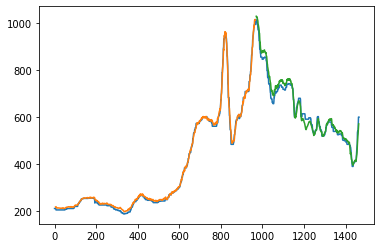

Epoch 1/10
 - 2s - loss: 0.0293 - val_loss: 0.0133
Epoch 2/10
 - 1s - loss: 0.0043 - val_loss: 0.0180
Epoch 3/10
 - 1s - loss: 0.0045 - val_loss: 0.0092
Epoch 4/10
 - 2s - loss: 0.0037 - val_loss: 0.0082
Epoch 5/10
 - 1s - loss: 0.0035 - val_loss: 0.0058
Epoch 6/10
 - 1s - loss: 0.0029 - val_loss: 0.0051
Epoch 7/10
 - 1s - loss: 0.0030 - val_loss: 0.0041
Epoch 8/10
 - 1s - loss: 0.0024 - val_loss: 0.0040
Epoch 9/10
 - 2s - loss: 0.0023 - val_loss: 0.0048
Epoch 10/10
 - 1s - loss: 0.0023 - val_loss: 0.0044
Train Score of product_4: 2.13 RMSE
Test Score of product_4: 3.75 RMSE


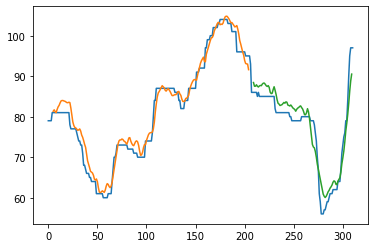

Epoch 1/10
 - 2s - loss: 0.0293 - val_loss: 0.0122
Epoch 2/10
 - 1s - loss: 0.0051 - val_loss: 0.0039
Epoch 3/10
 - 2s - loss: 0.0040 - val_loss: 0.0028
Epoch 4/10
 - 1s - loss: 0.0038 - val_loss: 0.0034
Epoch 5/10
 - 1s - loss: 0.0037 - val_loss: 0.0035
Epoch 6/10
 - 1s - loss: 0.0038 - val_loss: 6.8684e-04
Epoch 7/10
 - 1s - loss: 0.0033 - val_loss: 0.0046
Epoch 8/10
 - 1s - loss: 0.0033 - val_loss: 0.0028
Epoch 9/10
 - 1s - loss: 0.0030 - val_loss: 0.0025
Epoch 10/10
 - 1s - loss: 0.0028 - val_loss: 0.0025
Train Score of product_5: 8.11 RMSE
Test Score of product_5: 16.51 RMSE


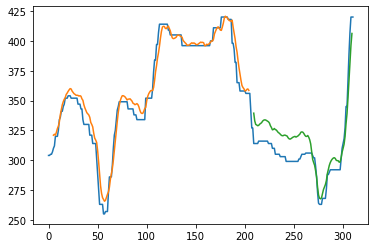

Epoch 1/10
 - 6s - loss: 0.0070 - val_loss: 0.0010
Epoch 2/10
 - 6s - loss: 0.0016 - val_loss: 3.1951e-04
Epoch 3/10
 - 5s - loss: 0.0011 - val_loss: 4.9276e-05
Epoch 4/10
 - 5s - loss: 9.2285e-04 - val_loss: 1.9129e-04
Epoch 5/10
 - 5s - loss: 7.4399e-04 - val_loss: 3.9408e-04
Epoch 6/10
 - 5s - loss: 6.8207e-04 - val_loss: 1.5672e-04
Epoch 7/10
 - 6s - loss: 6.1718e-04 - val_loss: 1.5102e-04
Epoch 8/10
 - 6s - loss: 4.9486e-04 - val_loss: 3.7762e-04
Epoch 9/10
 - 6s - loss: 6.0807e-04 - val_loss: 2.3006e-04
Epoch 10/10
 - 5s - loss: 4.4763e-04 - val_loss: 7.5369e-05
Train Score of product_6: 11.65 RMSE
Test Score of product_6: 12.70 RMSE


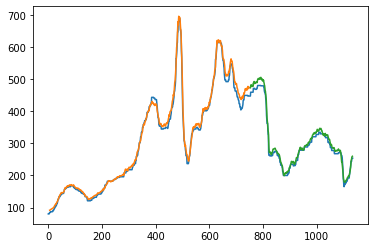

Epoch 1/10
 - 6s - loss: 0.0046 - val_loss: 0.0013
Epoch 2/10
 - 6s - loss: 0.0014 - val_loss: 5.3197e-04
Epoch 3/10
 - 6s - loss: 0.0013 - val_loss: 5.2826e-04
Epoch 4/10
 - 5s - loss: 9.1808e-04 - val_loss: 2.4980e-04
Epoch 5/10
 - 5s - loss: 8.0495e-04 - val_loss: 3.8168e-04
Epoch 6/10
 - 5s - loss: 7.1830e-04 - val_loss: 3.9109e-04
Epoch 7/10
 - 5s - loss: 6.5789e-04 - val_loss: 4.2347e-04
Epoch 8/10
 - 5s - loss: 6.6611e-04 - val_loss: 4.7894e-05
Epoch 9/10
 - 5s - loss: 5.6039e-04 - val_loss: 6.2359e-04
Epoch 10/10
 - 5s - loss: 4.9988e-04 - val_loss: 3.9123e-04
Train Score of product_7: 13.75 RMSE
Test Score of product_7: 18.19 RMSE


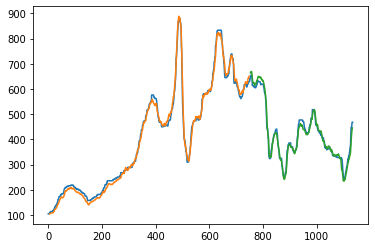

Epoch 1/10
 - 6s - loss: 0.0046 - val_loss: 0.0011
Epoch 2/10
 - 5s - loss: 0.0013 - val_loss: 6.3153e-04
Epoch 3/10
 - 5s - loss: 0.0010 - val_loss: 5.3440e-04
Epoch 4/10
 - 5s - loss: 9.9746e-04 - val_loss: 6.1142e-04
Epoch 5/10
 - 6s - loss: 7.7311e-04 - val_loss: 0.0012
Epoch 6/10
 - 6s - loss: 6.8643e-04 - val_loss: 2.5688e-04
Epoch 7/10
 - 5s - loss: 6.3862e-04 - val_loss: 1.4041e-04
Epoch 8/10
 - 5s - loss: 6.6551e-04 - val_loss: 4.0757e-04
Epoch 9/10
 - 5s - loss: 5.9972e-04 - val_loss: 7.9829e-05
Epoch 10/10
 - 5s - loss: 4.4850e-04 - val_loss: 1.1496e-04
Train Score of product_8: 12.42 RMSE
Test Score of product_8: 13.73 RMSE


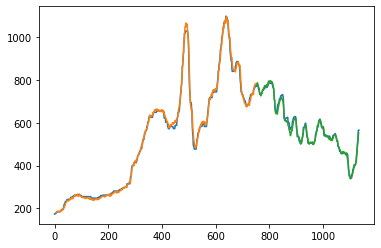

Epoch 1/10
 - 4s - loss: 0.0143 - val_loss: 4.7070e-04
Epoch 2/10
 - 2s - loss: 0.0029 - val_loss: 6.9251e-04
Epoch 3/10
 - 2s - loss: 0.0022 - val_loss: 5.1669e-04
Epoch 4/10
 - 2s - loss: 0.0021 - val_loss: 5.2509e-04
Epoch 5/10
 - 3s - loss: 0.0022 - val_loss: 4.1262e-04
Epoch 6/10
 - 3s - loss: 0.0019 - val_loss: 0.0010
Epoch 7/10
 - 3s - loss: 0.0017 - val_loss: 8.7987e-04
Epoch 8/10
 - 3s - loss: 0.0016 - val_loss: 0.0014
Epoch 9/10
 - 2s - loss: 0.0017 - val_loss: 7.0046e-04
Epoch 10/10
 - 3s - loss: 0.0014 - val_loss: 0.0013
Train Score of product_9: 12.76 RMSE
Test Score of product_9: 10.82 RMSE


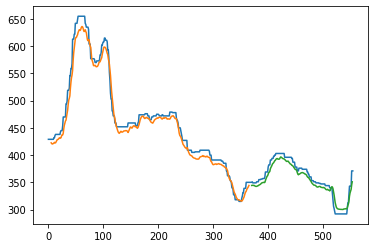

Epoch 1/10
 - 3s - loss: 0.0257 - val_loss: 5.7268e-04
Epoch 2/10
 - 2s - loss: 0.0024 - val_loss: 4.7598e-04
Epoch 3/10
 - 2s - loss: 0.0020 - val_loss: 6.1804e-04
Epoch 4/10
 - 2s - loss: 0.0019 - val_loss: 0.0012
Epoch 5/10
 - 2s - loss: 0.0019 - val_loss: 5.5286e-04
Epoch 6/10
 - 2s - loss: 0.0018 - val_loss: 0.0013
Epoch 7/10
 - 2s - loss: 0.0020 - val_loss: 0.0015
Epoch 8/10
 - 3s - loss: 0.0016 - val_loss: 0.0016
Epoch 9/10
 - 3s - loss: 0.0015 - val_loss: 0.0013
Epoch 10/10
 - 3s - loss: 0.0014 - val_loss: 0.0014
Train Score of product_10: 4.58 RMSE
Test Score of product_10: 8.57 RMSE


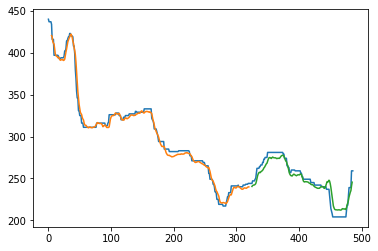

Epoch 1/10
 - 3s - loss: 0.0109 - val_loss: 0.0015
Epoch 2/10
 - 2s - loss: 0.0022 - val_loss: 0.0014
Epoch 3/10
 - 2s - loss: 0.0024 - val_loss: 0.0015
Epoch 4/10
 - 2s - loss: 0.0018 - val_loss: 0.0015
Epoch 5/10
 - 2s - loss: 0.0019 - val_loss: 0.0039
Epoch 6/10
 - 2s - loss: 0.0018 - val_loss: 0.0017
Epoch 7/10
 - 2s - loss: 0.0020 - val_loss: 0.0017
Epoch 8/10
 - 2s - loss: 0.0015 - val_loss: 0.0026
Epoch 9/10
 - 2s - loss: 0.0014 - val_loss: 0.0012
Epoch 10/10
 - 2s - loss: 0.0014 - val_loss: 0.0023
Train Score of product_11: 1.14 RMSE
Test Score of product_11: 1.45 RMSE


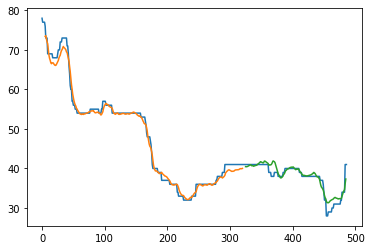

Epoch 1/10
 - 3s - loss: 0.0198 - val_loss: 0.0014
Epoch 2/10
 - 2s - loss: 0.0027 - val_loss: 0.0012
Epoch 3/10
 - 2s - loss: 0.0023 - val_loss: 4.0022e-04
Epoch 4/10
 - 2s - loss: 0.0021 - val_loss: 0.0011
Epoch 5/10
 - 3s - loss: 0.0020 - val_loss: 5.7122e-04
Epoch 6/10
 - 2s - loss: 0.0019 - val_loss: 8.8259e-04
Epoch 7/10
 - 2s - loss: 0.0018 - val_loss: 7.7890e-04
Epoch 8/10
 - 2s - loss: 0.0015 - val_loss: 4.2254e-04
Epoch 9/10
 - 2s - loss: 0.0017 - val_loss: 7.9623e-04
Epoch 10/10
 - 3s - loss: 0.0015 - val_loss: 7.8821e-04
Train Score of product_12: 22.00 RMSE
Test Score of product_12: 12.95 RMSE


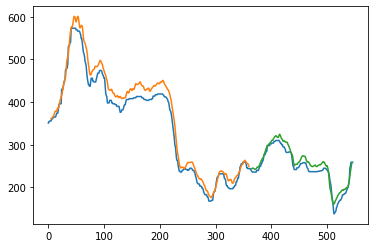

Epoch 1/10
 - 3s - loss: 0.0167 - val_loss: 0.0015
Epoch 2/10
 - 2s - loss: 0.0031 - val_loss: 4.9758e-04
Epoch 3/10
 - 2s - loss: 0.0028 - val_loss: 0.0014
Epoch 4/10
 - 3s - loss: 0.0023 - val_loss: 7.7442e-04
Epoch 5/10
 - 3s - loss: 0.0020 - val_loss: 0.0026
Epoch 6/10
 - 3s - loss: 0.0018 - val_loss: 3.0041e-04
Epoch 7/10
 - 2s - loss: 0.0018 - val_loss: 5.8675e-04
Epoch 8/10
 - 3s - loss: 0.0019 - val_loss: 4.0139e-04
Epoch 9/10
 - 2s - loss: 0.0017 - val_loss: 3.4604e-04
Epoch 10/10
 - 2s - loss: 0.0016 - val_loss: 8.8461e-04
Train Score of product_13: 12.97 RMSE
Test Score of product_13: 8.55 RMSE


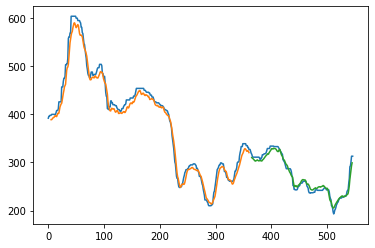

In [10]:
seq_size = length = 5 #Forecasting window (5 weeks)
batch_size = 1
num_features = 5


trainScore_list = []
testScore_list = []

# This loop will run the model for each product and calculate the RMSE for each product
for product in df_product.columns:
    df2 = df_features.merge(df_product[str(product)], how = 'right', on=df_product.index )
    
    df2 = df2.set_index('key_0')
    df2.index = pd.to_datetime(df2.index)
    df2 = df2.rename(index={'key_0': 'Date'})
    df2.index.names = ['Date']
    df2 = df2.dropna()
    
    #Scaling the data
    scaler = MinMaxScaler()
    dataset = scaler.fit_transform(df2)

    #Setting train and testing data (70:30 ratio)
    train_size = int(len(dataset) * 0.66)
    test_size = len(dataset) - train_size
    train,test = dataset[0:train_size:],dataset[train_size:len(dataset),:]
    
    #Formatting the data for time series forecasting
    train_generator = TimeseriesGenerator(train,train,length=length,batch_size=batch_size)
    validation_generator = TimeseriesGenerator(test,test,length=length,batch_size=batch_size)
    
    #Building the model
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=False, input_shape=(length, num_features)))
    model.add(Dense(32))
    model.add(Dense(num_features))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    #Fitting the model
    model.fit_generator(generator=train_generator, verbose=2, epochs=10, validation_data=validation_generator)

    #Generating Train and Test predictions
    trainPredict = model.predict(train_generator)
    testPredict = model.predict(validation_generator)
    
    #Reversing the scaling that's done above
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY_inverse = scaler.inverse_transform(train)
    testPredict = scaler.inverse_transform(testPredict)
    testY_inverse = scaler.inverse_transform(test)
    
    #Calculating training and testing error (RMSE)
    trainScore = math.sqrt(mean_squared_error(trainY_inverse[:,-1:][length:], trainPredict[:,-1:][:,0]))
    testScore = math.sqrt(mean_squared_error(testY_inverse[:,-1:][length:], testPredict[:,-1:][:,0]))
    print(f'Train Score of {product}: {trainScore:.2f} RMSE')
    print(f'Test Score of {product}: {testScore:.2f} RMSE')
    
    #Adding training and testing scores for each product for a seprate list so later we can calculate the average
    trainScore_list.append(trainScore)
    testScore_list.append(testScore)
    
    #Shfting the training results so that it lines up with the original data
    trainPredictPlot = np.empty_like(dataset[:,-1:])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[length:len(trainPredict[:,-1:])+length, :] = trainPredict[:,-1:]
    
    #Shifting the testing results so that it lines up with the original data
    testPredictPlot = np.empty_like(dataset[:,-1:])
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train)+(length)-1:len(dataset[:,-1:])-1, :] = testPredict[:,-1:]
    
    #Plotting the final results for each product. 
    plt.plot(scaler.inverse_transform(dataset)[:,-1:])
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

### Calculating the overall final results. 

In [11]:
print(f'Average Train Score = {sum(trainScore_list)/len(trainScore_list)}')
print(f'Average Test Score = {sum(testScore_list)/len(testScore_list)}')

Average Train Score = 9.701833874758266
Average Test Score = 11.7982463698908


Final results:

|Model|Average Training Error|Average Testing Error|
|------|------|------|
|Baseline|6.96|7.59|
|Alternative model (With Brent and WTI data as features)|9.70|11.79|

Technically speaking the baseline model performed slighyly better. Generally speaking I would say that both model perforemd fairly similarly. This means that, based on the results of these models, the Brent and WTI data has close no effect (depending on your requirements) when it comes to predicting the prices of these products. 

#### Note: These numbers could change slightly on each run due to randomness. The conclusion will remain the same.